<div style="text-align: center; background: linear-gradient(135deg, #053ba8, #3d32a6); padding: 30px; box-shadow: 0px 2px 13px rgba(0, 0, 0, 0.2);border-radius: 15px;">
    <h1 style="color: white; font-family: 'Times New Roman', serif; font-weight: bold; font-size: 48px;text-transform: uppercase;letter-spacing: 6px; text-shadow: 3px 3px 6px rgba(0, 0, 0, 0.3);">AIStockPicker ML Pipeline</h1>
</div>

In [38]:
import pandas as pd
import datetime
import mplfinance as mpf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
binance_dark = {
    "base_mpl_style": "dark_background",
    "marketcolors": {
        "candle": {"up": "#3dc985", "down": "#ef4f60"},  
        "edge": {"up": "#3dc985", "down": "#ef4f60"},  
        "wick": {"up": "#3dc985", "down": "#ef4f60"},  
        "ohlc": {"up": "green", "down": "red"},
        "volume": {"up": "#247252", "down": "#82333f"},  
        "vcedge": {"up": "green", "down": "red"},  
        "vcdopcod": False,
        "alpha": 1,
    },
    "mavcolors": ("#ad7739", "#a63ab2", "#62b8ba"),
    "facecolor": "#1b1f24",
    "gridcolor": "#2c2e31",
    "gridstyle": "--",
    "y_on_right": True,
    "rc": {
        "axes.grid": True,
        "axes.grid.axis": "y",
        "axes.edgecolor": "#474d56",
        "axes.titlecolor": "red",
        "figure.facecolor": "#161a1e",
        "figure.titlesize": "x-large",
        "figure.titleweight": "semibold",
    },
    "base_mpf_style": "binance-dark",
}

In [24]:
stocks_table= catalog.load('raw_stocks_table')

[01/11/24 21:17:24] INFO     Loading data from 'raw_stocks_table' (SQLTableDataSet)...          ]8;id=103841;file://C:\Users\Pedro\Anaconda\envs\kedro-env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=226673;file://C:\Users\Pedro\Anaconda\envs\kedro-env\Lib\site-packages\kedro\io\data_catalog.py#492\492]8;;\

# Data Processing Pipeline

In [25]:
stocks_table = stocks_table.loc[stocks_table['stock_index'] == "AAPL"]

In [26]:
stocks_table=stocks_table.ffill().bfill()
stocks_table.set_index('datetime',inplace=True)

**Creating SMA**

In [32]:
stocks_table['SMA21']=stocks_table['close'].rolling(21).mean()
stocks_table['SMA50']=stocks_table['close'].rolling(50).mean()
stocks_table['SMA100']=stocks_table['close'].rolling(100).mean()

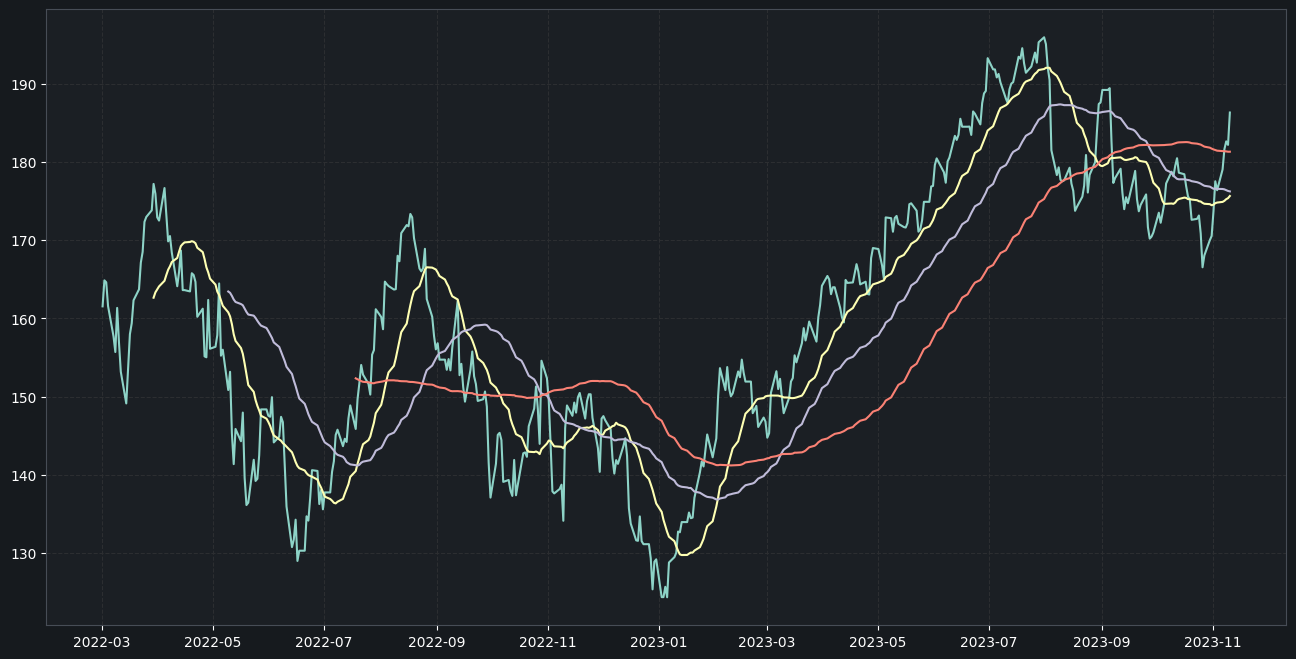

In [33]:
plt.figure(figsize=(16,8))
plt.plot(stocks_table['close'])
plt.plot(stocks_table['SMA21'])
plt.plot(stocks_table['SMA50'])
plt.plot(stocks_table['SMA100'])
plt.show()

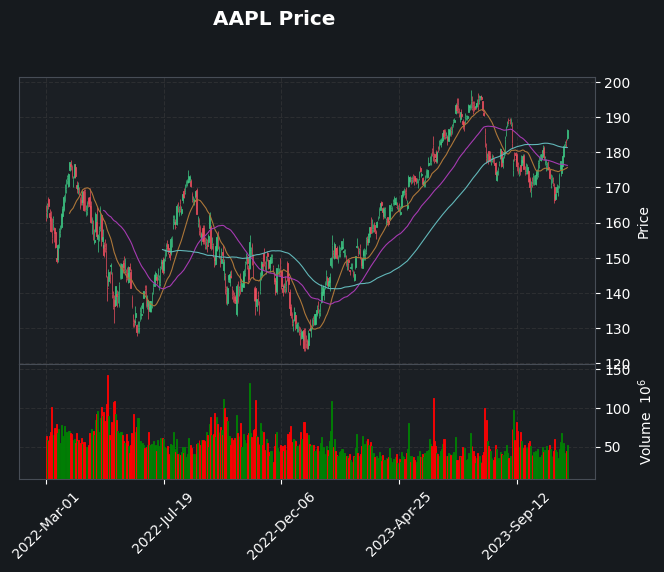

In [36]:
mpf.plot(
    stocks_table,
    type="candle", 
    title = f"AAPL Price",  
    style=binance_dark,
    volume=True,
    mav=(21, 50, 100),
    update_width_config=dict(candle_linewidth=0.5, candle_width=0.5),

    )